In [119]:
import pandas as pd

In [120]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Machine Learning/ML Algorithms/Decision Tree/Copy of diabetes.csv")

In [121]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [122]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [123]:
x = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [124]:
from sklearn.feature_selection import SelectKBest as skb
skb_object = skb(k = 7)
skb_object_fit = skb_object.fit(x, y)

print(skb_object_fit.scores_)

[ 39.67022739 213.16175218   3.2569504    4.30438091  13.28110753
  71.7720721   23.8713002   46.14061124]


In [125]:
score_data = pd.DataFrame([df.columns.drop("Outcome"), skb_object_fit.scores_], index = ["Attribute", "Score"])
score_data

,0,1,2,3,4,5,6,7
Attribute,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Score,39.670227,213.161752,3.25695,4.304381,13.281108,71.772072,23.8713,46.140611


In [126]:
from sklearn.model_selection import train_test_split as tts
x_train, x_test, y_train, y_test = tts(x, y, test_size = 0.2, random_state = 0)

In [127]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()

x_train = ss.fit_transform(x_train)
x_test = ss.fit_transform(x_test)

In [128]:
from sklearn import tree
dt = tree.DecisionTreeClassifier(max_depth = 3, criterion = "entropy")
dt.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [129]:
y_pred = dt.predict(x_test)
y_pred

array([1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0])

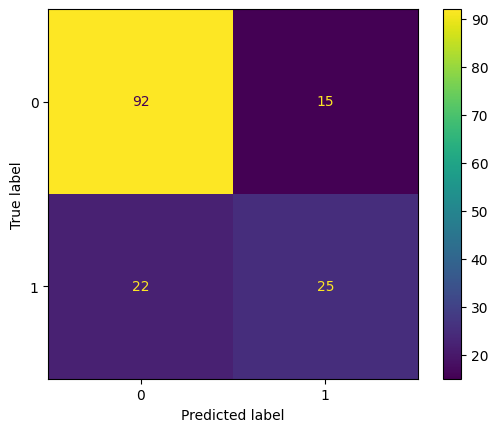

In [130]:
from sklearn.metrics import ConfusionMatrixDisplay as cmd
cmd.from_predictions(y_test, y_pred)

In [131]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [132]:
dt.classes_

array([0, 1])

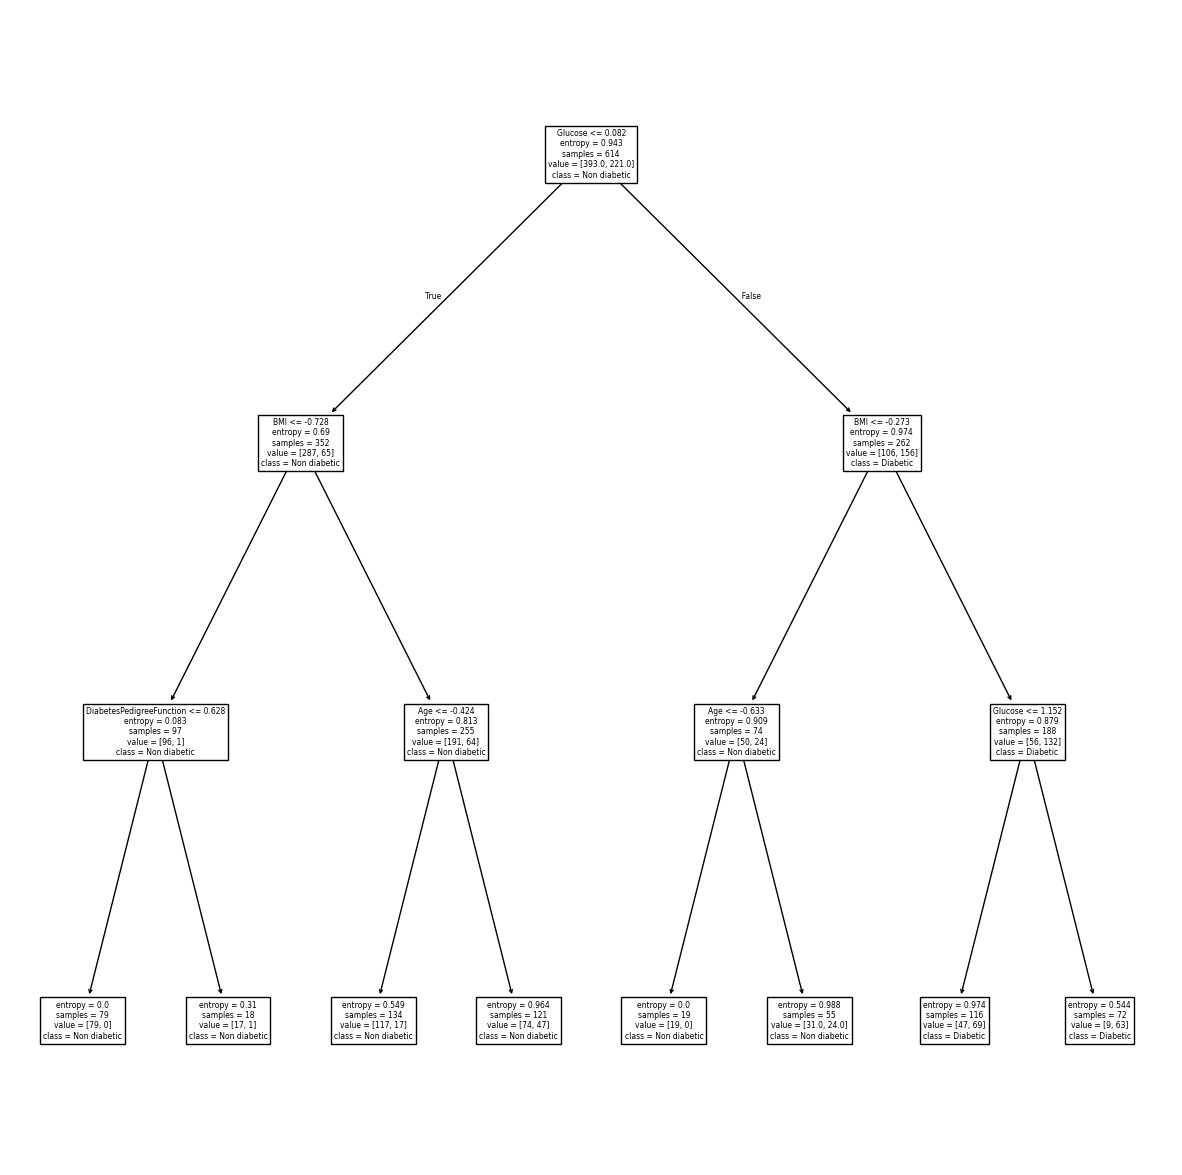

In [133]:
import matplotlib.pyplot as plt
plt.figure(figsize = (15, 15))
tree.plot_tree(dt, feature_names = df.columns, class_names = ["Non diabetic", "Diabetic"])
plt.show()